# Bellabeat Wellness Analysis

## **1) Ask**

### 1.1) Understanding Key Stakeholders

### 1.2) Define the Business Task

Understand how consumers are using their smart devices to guide a marketing strategy for  Bellabeat.

## **2) Prepare**

### 2.1) Understanding the Data Source & Credibility

These data are taken originally from [here](https://zenodo.org/record/53894#.YMoUpnVKiP9) then subsequently posted on Kaggle [here](https://www.kaggle.com/datasets/arashnic/fitbit?datasetId=1041311). They were collected through a survey via *Amazon Mechanical Turk* between 12-03-2016 and 12-5-2016. These data consist of thirty "eligible" Fitbit users including daily, hourly, and by minute calories burned, intensities of exercise, and steps. They also include sleep, weight, and heartrate data. The collectors of these data did not elaborate on how they considered users "eligible" but did acknowledge that variation in the outputs could be a result of different Fitbit models and participant behavior and preferences. These data seem credible even though they are crowd-sourced and from a third party. Said data is also current, as it was updated in 2021.

### 2.2) Choosing Which Datasets to Use

I decided to use ```dailyActivity_merged```, as it is a collective file of ```dailyCalories_merged```, ```dailyIntensities_merged```, and ```dailySteps_merged```. The hourly calorie, intensitiy, and step datasets were used, along with the weight log, daily sleep, and heart rate log datasets. Minute datasets seemed unnecessary, and the three daily datasets stated above have redundant information.

## **3) Process**

### 3.1) Data Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

PATH = './data/'

daily_activity_df = pd.read_csv(PATH + 'dailyActivity_merged.csv')

hourly_calorie_df = pd.read_csv(PATH + 'hourlyCalories_merged.csv')
hourly_intensity_df = pd.read_csv(PATH + 'hourlyIntensities_merged.csv')
hourly_step_df = pd.read_csv(PATH + 'hourlySteps_merged.csv')

heartrate_df = pd.read_csv(PATH + 'heartrate_seconds_merged.csv')
sleep_day_df = pd.read_csv(PATH + 'sleepDay_merged.csv')
weight_log_df = pd.read_csv(PATH + 'weightLogInfo_merged.csv')

### 3.2) Data Exploration

Let's understand a little bit about the data.

In [2]:
print(daily_activity_df.describe())
print(daily_activity_df.dtypes)

                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                940.000000          940.000000                940.000000   
mean                   0.108171            1.502681                  0.567543   
std                    0.619897            2.658941                  0.883580   
min                    0.000000            0.000000   

There are a couple of concerning metrics shown in this summary. The min of ```TotalSteps``` is zero. This is odd, since the average person does not walk zero steps in a day. Another concerning metric is that the max of the ```TotalSteps``` is 36,000 steps in one day. The CDC typically [recommends a goal of 10,000 steps per day](https://www.cdc.gov/diabetes/prevention/pdf/postcurriculum_session8.pdf). More than three times that seems like an error, so I will explore this as well.

In [3]:
print(hourly_calorie_df.describe())
print(hourly_calorie_df.dtypes)

                 Id      Calories
count  2.209900e+04  22099.000000
mean   4.848235e+09     97.386760
std    2.422500e+09     60.702622
min    1.503960e+09     42.000000
25%    2.320127e+09     63.000000
50%    4.445115e+09     83.000000
75%    6.962181e+09    108.000000
max    8.877689e+09    948.000000
Id               int64
ActivityHour    object
Calories         int64
dtype: object


In [4]:
print(hourly_intensity_df.describe())
print(hourly_intensity_df.dtypes)

                 Id  TotalIntensity  AverageIntensity
count  2.209900e+04    22099.000000      22099.000000
mean   4.848235e+09       12.035341          0.200589
std    2.422500e+09       21.133110          0.352219
min    1.503960e+09        0.000000          0.000000
25%    2.320127e+09        0.000000          0.000000
50%    4.445115e+09        3.000000          0.050000
75%    6.962181e+09       16.000000          0.266667
max    8.877689e+09      180.000000          3.000000
Id                    int64
ActivityHour         object
TotalIntensity        int64
AverageIntensity    float64
dtype: object


In [5]:
print(hourly_step_df.describe())
print(hourly_step_df.dtypes)

                 Id     StepTotal
count  2.209900e+04  22099.000000
mean   4.848235e+09    320.166342
std    2.422500e+09    690.384228
min    1.503960e+09      0.000000
25%    2.320127e+09      0.000000
50%    4.445115e+09     40.000000
75%    6.962181e+09    357.000000
max    8.877689e+09  10554.000000
Id               int64
ActivityHour    object
StepTotal        int64
dtype: object


In [6]:
print(heartrate_df.describe())
print(heartrate_df.dtypes)

                 Id         Value
count  2.483658e+06  2.483658e+06
mean   5.513765e+09  7.732842e+01
std    1.950224e+09  1.940450e+01
min    2.022484e+09  3.600000e+01
25%    4.388162e+09  6.300000e+01
50%    5.553957e+09  7.300000e+01
75%    6.962181e+09  8.800000e+01
max    8.877689e+09  2.030000e+02
Id        int64
Time     object
Value     int64
dtype: object


In [7]:
print(sleep_day_df.describe())
print(sleep_day_df.dtypes)

                 Id  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed
count  4.130000e+02         413.000000          413.000000      413.000000
mean   5.000979e+09           1.118644          419.467312      458.639225
std    2.060360e+09           0.345521          118.344679      127.101607
min    1.503960e+09           1.000000           58.000000       61.000000
25%    3.977334e+09           1.000000          361.000000      403.000000
50%    4.702922e+09           1.000000          433.000000      463.000000
75%    6.962181e+09           1.000000          490.000000      526.000000
max    8.792010e+09           3.000000          796.000000      961.000000
Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object


In [8]:
print(weight_log_df.describe())
print(weight_log_df.dtypes)

                 Id    WeightKg  WeightPounds       Fat        BMI  \
count  6.700000e+01   67.000000     67.000000   2.00000  67.000000   
mean   7.009282e+09   72.035821    158.811801  23.50000  25.185224   
std    1.950322e+09   13.923206     30.695415   2.12132   3.066963   
min    1.503960e+09   52.599998    115.963147  22.00000  21.450001   
25%    6.962181e+09   61.400002    135.363832  22.75000  23.959999   
50%    6.962181e+09   62.500000    137.788914  23.50000  24.389999   
75%    8.877689e+09   85.049999    187.503152  24.25000  25.559999   
max    8.877689e+09  133.500000    294.317120  25.00000  47.540001   

              LogId  
count  6.700000e+01  
mean   1.461772e+12  
std    7.829948e+08  
min    1.460444e+12  
25%    1.461079e+12  
50%    1.461802e+12  
75%    1.462375e+12  
max    1.463098e+12  
Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport 

In [9]:
# Checking if any of the datasets have null values
print(daily_activity_df.isnull().values.any())
print(hourly_calorie_df.isnull().values.any())
print(hourly_intensity_df.isnull().values.any())
print(hourly_step_df.isnull().values.any())
print(heartrate_df.isnull().values.any())
print(sleep_day_df.isnull().values.any())
print(weight_log_df.isnull().values.any())

False
False
False
False
False
False
True


In [10]:
# Looks like the weight log has some missing values. Let's take a look.
weight_log_df[weight_log_df.isna().any(axis=1)]

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
6,4319703577,5/4/2016 11:59:59 PM,72.300003,159.394222,NaN,27.379999,True,1462406399000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


Looks like all of the NaN values in the weight log dataframe come from the Fat column. It does not look like this has a discernible pattern as to when a NaN occurs. Some examples of these patterns could be if the report was manual or not, or if the person ID is the same.

In [11]:
# Let's now explore the zero data within the daily activity df
daily_activity_df.loc[daily_activity_df['TotalSteps'] == 0]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
30,1503960366,5/12/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
104,1844505072,4/24/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
105,1844505072,4/25/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
106,1844505072,4/26/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
112,1844505072,5/2/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,8792009665,5/6/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688
905,8792009665,5/7/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688
906,8792009665,5/8/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688
907,8792009665,5/9/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688


This is quite interesting. There are 77 instances of (pretty much) null values. Out of 940 total data points, this represents about 8% of the total activity data. It seems impossible for a person to not record any steps during their day. These values could likely come from the person not wearing the fitbit during that day, or it could be some strange reporting error. In either case, these data points can be ignored, as they are not relevant to the analysis. Since the activity data are agregated, the hourly data should also reflect this.

In [12]:
# Exploring the high max step statistic
daily_activity_df.loc[daily_activity_df['TotalSteps'] > 25000]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
50,1624580081,5/1/2016,36019,28.030001,28.030001,0.0,21.92,4.19,1.91,0.02,186,63,171,1020,2690
913,8877689391,4/16/2016,29326,25.290001,25.290001,0.0,13.24,1.21,10.71,0.00,94,29,429,888,4547
927,8877689391,4/30/2016,27745,26.719999,26.719999,0.0,21.66,0.08,4.93,0.00,124,4,223,1089,4398


In [13]:
# Looking at all records from the outlier's Id
daily_activity_df.loc[daily_activity_df['Id'] == 1624580081]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
31,1624580081,4/12/2016,8163,5.310000,5.310000,0.0,0.00,0.00,5.31,0.00,0,0,146,1294,1432
32,1624580081,4/13/2016,7007,4.550000,4.550000,0.0,0.00,0.00,4.55,0.00,0,0,148,1292,1411
33,1624580081,4/14/2016,9107,5.920000,5.920000,0.0,0.00,0.00,5.91,0.01,0,0,236,1204,1572
34,1624580081,4/15/2016,1510,0.980000,0.980000,0.0,0.00,0.00,0.97,0.00,0,0,96,1344,1344
35,1624580081,4/16/2016,5370,3.490000,3.490000,0.0,0.00,0.00,3.49,0.00,0,0,176,1264,1463
36,1624580081,4/17/2016,6175,4.060000,4.060000,0.0,1.03,1.52,1.49,0.01,15,22,127,1276,1554
37,1624580081,4/18/2016,10536,7.410000,7.410000,0.0,2.15,0.62,4.62,0.01,17,7,202,1214,1604
38,1624580081,4/19/2016,2916,1.900000,1.900000,0.0,0.00,0.00,1.90,0.00,0,0,141,1299,1435
39,1624580081,4/20/2016,4974,3.230000,3.230000,0.0,0.00,0.00,3.23,0.00,0,0,151,1289,1446
40,1624580081,4/21/2016,6349,4.130000,4.130000,0.0,0.00,0.00,4.11,0.02,0,0,186,1254,1467


It looks like that this value is reasonable and simply an outlier for this individual, as the active distances as well as the active minutes seem to be greater than the active distances and minutes in the 25,000 to 30,000 step range. It does seem strange, however, that the calories burned for 36,000 steps is around half of the calories burned for 29,000 steps (2690 calories and 4547 calories respectively). This could attribute to the overestimation stated in the BBC article mentioned in the "**Prepare**" section.

### 3.3) Data Cleaning

There are a couple of things I need to do to clean these data:

* Merge hourly dataframe
* Convert ```object``` types of dates to ```datetime```
* Convert ```dd/mm/YYYY II:MM:SS pp``` dates to ```YYYY-mm-dd HH:MM:SS```
* Remove null values
* Drop columns that are not needed in the analysis

In [14]:
# Merging hourly dataframes
hourly_df = hourly_calorie_df.merge(hourly_intensity_df, how = 'left').merge(hourly_step_df, how = 'left')
print(hourly_df.shape)
hourly_df.head()

(22099, 6)


,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,81,20,0.333333,373
1,1503960366,4/12/2016 1:00:00 AM,61,8,0.133333,160
2,1503960366,4/12/2016 2:00:00 AM,59,7,0.116667,151
3,1503960366,4/12/2016 3:00:00 AM,47,0,0.000000,0
4,1503960366,4/12/2016 4:00:00 AM,48,0,0.000000,0


In [15]:
# Converting object to datetype and to YYYY-mm-dd format
daily_activity_df['ActivityDate'] = pd.to_datetime(daily_activity_df['ActivityDate'], format="%m/%d/%Y")
hourly_df['ActivityHour'] = pd.to_datetime(hourly_df['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
heartrate_df['Time'] = pd.to_datetime(heartrate_df['Time'], format="%m/%d/%Y %I:%M:%S %p")
sleep_day_df['SleepDay'] = pd.to_datetime(sleep_day_df['SleepDay'], format="%m/%d/%Y %I:%M:%S %p")
weight_log_df['Date'] = pd.to_datetime(weight_log_df['Date'], format="%m/%d/%Y %I:%M:%S %p")

In [16]:
# Sanity check
print(daily_activity_df['ActivityDate'].dtypes)
print(hourly_df['ActivityHour'].dtypes)
print(heartrate_df['Time'].dtypes)
print(sleep_day_df['SleepDay'].dtypes)
print(weight_log_df['Date'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [17]:
# Adding date without time as a column for boolean indexing in removing the null values
hourly_df['Date'] = hourly_df['ActivityHour'].dt.strftime('%Y-%m-%d')

# Sanity check
hourly_df['Date'].head()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal,Date
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373,2016-04-12
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160,2016-04-12
2,1503960366,2016-04-12 02:00:00,59,7,0.116667,151,2016-04-12
3,1503960366,2016-04-12 03:00:00,47,0,0.000000,0,2016-04-12
4,1503960366,2016-04-12 04:00:00,48,0,0.000000,0,2016-04-12
...,...,...,...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,126,12,0.200000,514,2016-05-12
22095,8877689391,2016-05-12 11:00:00,192,29,0.483333,1407,2016-05-12
22096,8877689391,2016-05-12 12:00:00,321,93,1.550000,3135,2016-05-12
22097,8877689391,2016-05-12 13:00:00,101,6,0.100000,307,2016-05-12


In [18]:
# Creating null value dataframe for boolean indexing use
null_activity_df = daily_activity_df.loc[daily_activity_df['TotalSteps'] == 0] 

# Removing null values from daily activity
daily_activity_df = daily_activity_df.loc[daily_activity_df['TotalSteps'] != 0]

# Also need to remove the same values from the hourly dataframe
null_removal_check = pd.Series(hourly_df.Id.isin(null_activity_df.Id) & hourly_df.Date.isin(null_activity_df.ActivityDate))
null_removal_check[null_removal_check].index

Index([], dtype='int64')

In [19]:
# Sanity check for daily activity dataframe
daily_activity_df.loc[daily_activity_df['TotalSteps'] == 0]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


It seems that there are no matching values in the null activity dataframe and the hourly activity dataframe. I decided to try matching up the Id of the participant with the date that the activity was at 0. This was done to keep the analyses consistent.

In [20]:
# Dropping unnecessary columns
daily_activity_df = daily_activity_df.drop(['TrackerDistance'], axis=1)
print(daily_activity_df.columns)

hourly_df = hourly_df.drop(['Date'], axis=1)
print(hourly_df.columns)

sleep_day_df = sleep_day_df.drop(['TotalSleepRecords'], axis=1)
print(sleep_day_df.columns)

weight_log_df = weight_log_df.drop(['Fat', 'LogId'], axis=1)
print(weight_log_df.columns)

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Index(['Id', 'ActivityHour', 'Calories', 'TotalIntensity', 'AverageIntensity',
       'StepTotal'],
      dtype='object')
Index(['Id', 'SleepDay', 'TotalMinutesAsleep', 'TotalTimeInBed'], dtype='object')
Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'BMI', 'IsManualReport'], dtype='object')


Here is a comprehensive list and reason for dropping the columns in the above cell:

* ```TrackerDistance``` was dropped from the activity dataframe due to it being redundant values. The ```TotalDistance``` column is exactly the same.
* ```Date``` from the hourly dataframe was dropped due to it only being used for boolean indexing.
* ```TotalSleepRecords``` from the sleep dataframe did not seem useful as data, so the column was dropped.
* ```Fat``` and ```LogId``` was dropped from the weight dataframe due to ```Fat``` having missing values and both being somewhat unnecessary for analysis.

# 4) Analyze

I will now try to understand what trends are in these data. Let's try to first see how Fitbit customers are using their tracker products.

In [21]:
logged_distance_count = (daily_activity_df['LoggedActivitiesDistance'] != 0).sum()
total_count = (daily_activity_df['LoggedActivitiesDistance'] == 0).sum() + logged_distance_count
print('The number of logged activities is: ', logged_distance_count)
print('The percentage of logged activities is: ', (logged_distance_count/total_count) * 100, '%')

The number of logged activities is:  32
The percentage of logged activities is:  3.7079953650057935 %


In [29]:
daily_activity_df.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,8.630000e+02,863,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,4.857542e+09,2016-04-26 02:16:49.501738240,8319.392816,5.979513,0.117822,1.636756,0.618181,3.638899,0.001750,23.015064,14.775203,210.016222,955.753187,2361.295481
min,1.503960e+09,2016-04-12 00:00:00,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000
25%,2.320127e+09,2016-04-18 00:00:00,4923.000000,3.370000,0.000000,0.000000,0.000000,2.345000,0.000000,0.000000,0.000000,146.500000,721.500000,1855.500000
50%,4.445115e+09,2016-04-26 00:00:00,8053.000000,5.590000,0.000000,0.410000,0.310000,3.580000,0.000000,7.000000,8.000000,208.000000,1021.000000,2220.000000
75%,6.962181e+09,2016-05-03 00:00:00,11092.500000,7.900000,0.000000,2.275000,0.865000,4.895000,0.000000,35.000000,21.000000,272.000000,1189.000000,2832.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,2.418405e+09,NaN,4744.967224,3.721044,0.646111,2.735289,0.905049,1.857503,0.007651,33.646118,20.427405,96.781296,280.293359,702.711148


In [30]:
hourly_df.describe()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
count,2.209900e+04,22099,22099.000000,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,2016-04-26 11:46:42.588352512,97.386760,12.035341,0.200589,320.166342
min,1.503960e+09,2016-04-12 00:00:00,42.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 01:00:00,63.000000,0.000000,0.000000,0.000000
50%,4.445115e+09,2016-04-26 06:00:00,83.000000,3.000000,0.050000,40.000000
75%,6.962181e+09,2016-05-03 19:00:00,108.000000,16.000000,0.266667,357.000000
max,8.877689e+09,2016-05-12 15:00:00,948.000000,180.000000,3.000000,10554.000000
std,2.422500e+09,NaN,60.702622,21.133110,0.352219,690.384228


In [35]:
heartrate_df['Value'].describe().apply(lambda x: format(x,'f'))

count    2483658.000000
mean          77.328424
std           19.404500
min           36.000000
25%           63.000000
50%           73.000000
75%           88.000000
max          203.000000
Name: Value, dtype: object

In [61]:
total_manual_report = (weight_log_df['IsManualReport'] == True).sum()
total_report_num = (weight_log_df['IsManualReport'] == False).sum() + total_manual_report
manual_report_df = weight_log_df[['Id', 'IsManualReport']]
print(manual_report_df.groupby(['Id']).value_counts())

print('The total number of manual weight reports is', total_manual_report)
print('The percentage of manual reports out of all weight reports is', (total_manual_report/total_report_num)*100, '%')

Id          IsManualReport
1503960366  True               2
1927972279  False              1
2873212765  True               2
4319703577  True               2
4558609924  True               5
5577150313  False              1
6962181067  True              30
8877689391  False             24
Name: count, dtype: int64
The total number of manual weight reports is 41
The percentage of manual reports out of all weight reports is 61.19402985074627 %


Key Findings:

* Typically, these users do not manually log their activity. Around 4% of all activity logs showed an activity that was logged manually.
* The average steps taken daily across all logs is 8319 steps.
* Users average around 23 very active minutes, 14 fairly active minutes, 210 lightly active minutes, and 955 sedentary minutes per day.
* The average number of calories burned per day is 2361.
* On an hourly basis, users on average take 320 steps and burn 97 calories.
* The average heart rate across all logs was 77 bpm.
* When users report weight, they report it either fully automatically or fully manually.
* Out of the users whos data we have, the majority of users manually report their weight. 

# 5) Share

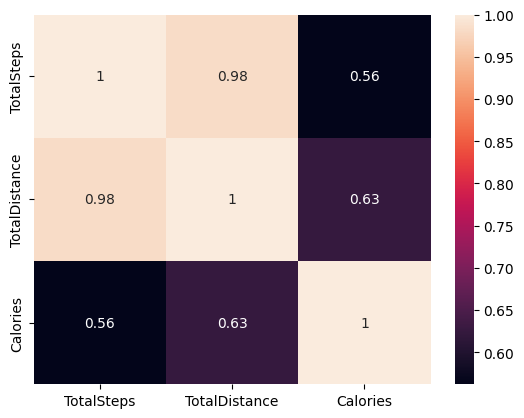

In [24]:
cols = ['TotalSteps', 'TotalDistance', 'Calories']

corr_matrix = daily_activity_df[cols].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()